In [27]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from skimage.transform import resize


processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

In [28]:
from PIL import Image
import os
from PIL import Image

image_folder = "/home/diego/Documents/Human-Segmentation-Images/Images"
image_files = os.listdir(image_folder)

image_array = []
for file_name in image_files:
    image_path = os.path.join(image_folder, file_name)
    image = Image.open(image_path)
    image_array.append(image)

image_array

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1440>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=R

In [29]:
# cropped_images = []
# for image in image_array:
#     width, height = image.size
#     half_width = width // 2
#     left_image = image.crop((0, 0, half_width, height))
#     right_image = image.crop((half_width, 0, width, height))
#     cropped_images.append(left_image)
#     cropped_images.append(right_image)


In [30]:
import torch
processed_images = []
prompts = ["human", "cars"]
for image in image_array:
  print("Number of images left:", len(image_array) - image_array.index(image))
  inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs)
  preds = outputs.logits.unsqueeze(1)
  processed_images.append(preds)


Number of images left: 41
Number of images left: 40
Number of images left: 39
Number of images left: 38
Number of images left: 37
Number of images left: 36
Number of images left: 35
Number of images left: 34
Number of images left: 33
Number of images left: 32
Number of images left: 31
Number of images left: 30
Number of images left: 29
Number of images left: 28
Number of images left: 27
Number of images left: 26
Number of images left: 25
Number of images left: 24
Number of images left: 23
Number of images left: 22
Number of images left: 21
Number of images left: 20
Number of images left: 19
Number of images left: 18
Number of images left: 17
Number of images left: 16
Number of images left: 15
Number of images left: 14
Number of images left: 13
Number of images left: 12
Number of images left: 11
Number of images left: 10
Number of images left: 9
Number of images left: 8
Number of images left: 7
Number of images left: 6
Number of images left: 5
Number of images left: 4
Number of images l

In [31]:
import numpy as np
numpy_images = [np.array(image) for image in image_array]


torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2,

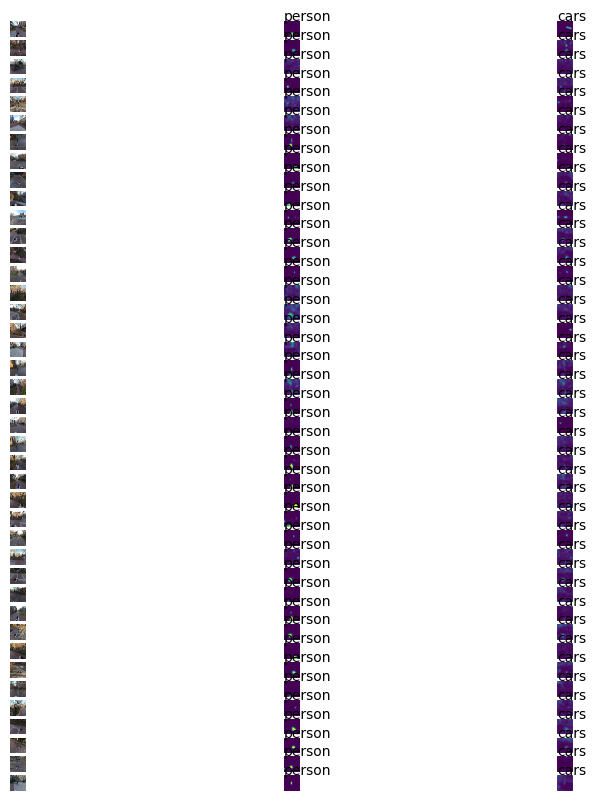

In [32]:
import matplotlib.pyplot as plt

for image in processed_images:
    print(image.size())
_, ax = plt.subplots(len(processed_images), len(prompts) + 1, figsize=(10, 10))
for i, image in enumerate(processed_images):
    [a.axis('off') for a in ax[i].flatten()]
    ax[i, 0].imshow(image_array[i])
    [ax[i, j+1].imshow(torch.sigmoid(processed_images[i][j][0])) for j in range(len(prompts))]
    [ax[i, j+1].text(0, -15, prompt) for j, prompt in enumerate(prompts)]


In [33]:
threshold = 0.5  # Set the probability threshold

thresholded_images = []
for image in processed_images:
    thresholded_image = torch.where(image >= threshold, torch.ones_like(image), torch.zeros_like(image))
    thresholded_images.append(thresholded_image)


torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2, 1, 352, 352])
torch.Size([2,

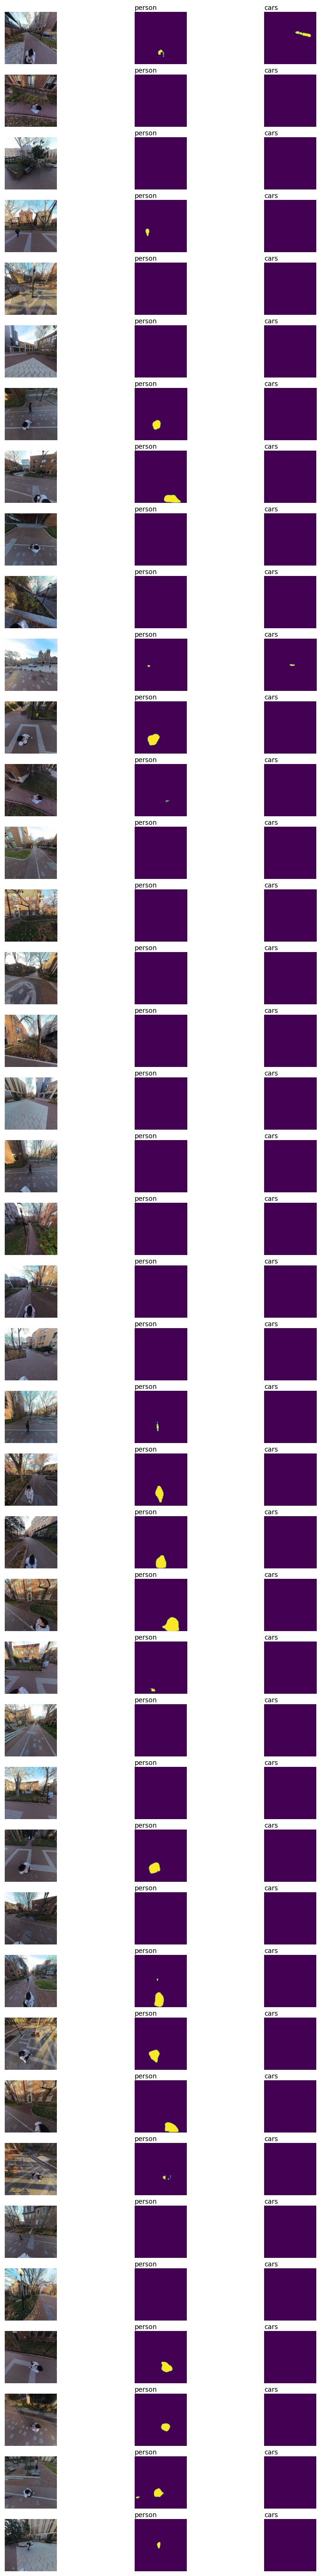

In [34]:
for image in thresholded_images:
    print(image.size())
_, ax = plt.subplots(len(thresholded_images), len(prompts) + 1, figsize=(10, 70))
for i, image in enumerate(thresholded_images):
    [a.axis('off') for a in ax[i].flatten()]
    ax[i, 0].imshow(image_array[i])
    [ax[i, j+1].imshow(torch.sigmoid(thresholded_images[i][j][0])) for j in range(len(prompts))]
    [ax[i, j+1].text(0, -15, prompt) for j, prompt in enumerate(prompts)]

In [35]:
rescaled_labels = []
for i in range(len(image_array)):
    for j in range(len(prompts)):
        image = numpy_images[i]
        print("Image Shape", image.shape)
        label = torch.sigmoid(thresholded_images[i][j][0])
        print("Label Shape", label.shape)
        numpyLabel = np.array(label)
        rescaled_label = resize(numpyLabel, image.shape)
        
        rescaled_label = np.where(rescaled_label < 0.7, 0, 255)
        rescaled_labels.append(rescaled_label)
        

Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352, 352])
Image Shape (1440, 1440, 3)
Label Shape torch.Size([352

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


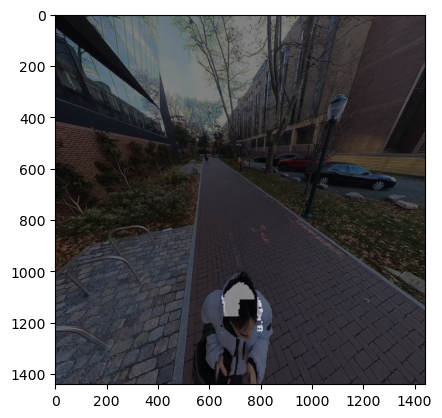

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


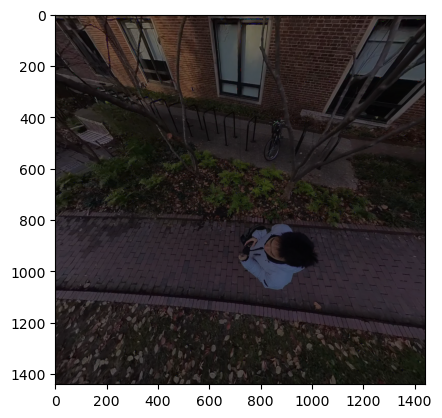

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


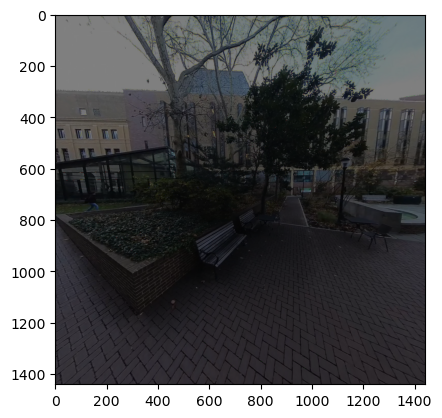

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


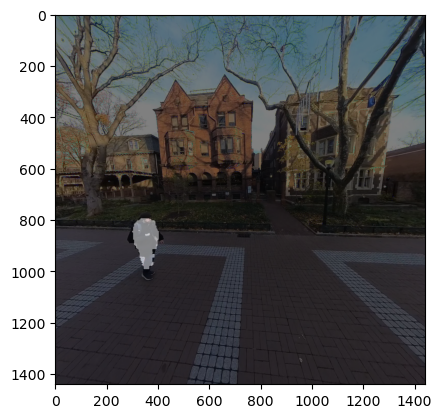

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


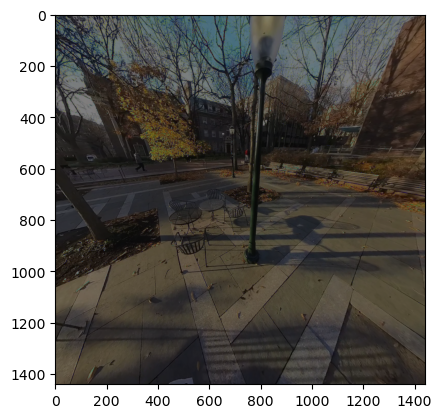

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


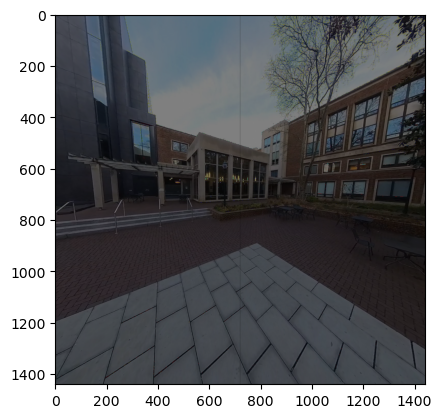

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


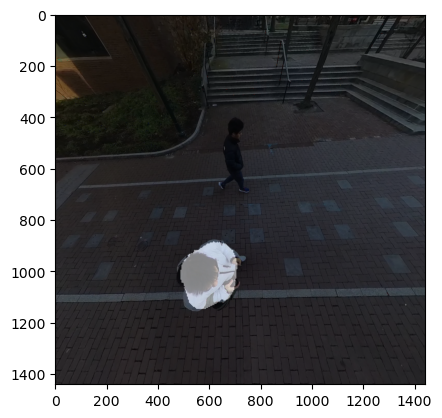

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


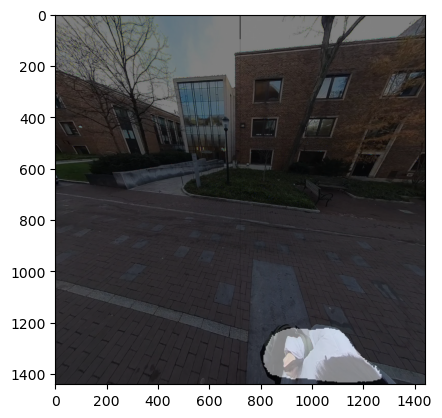

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


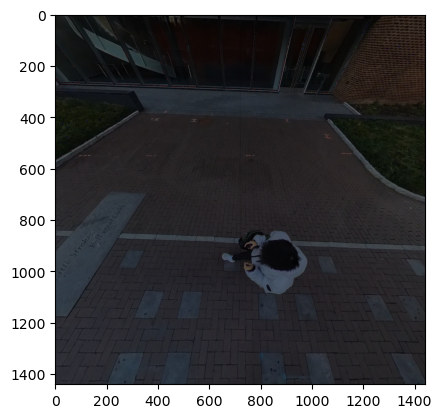

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


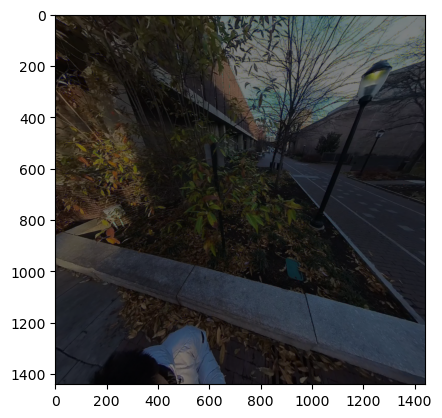

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


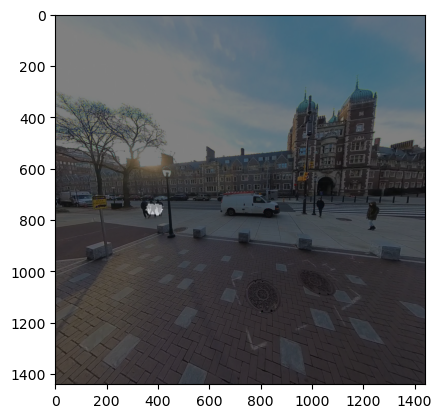

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


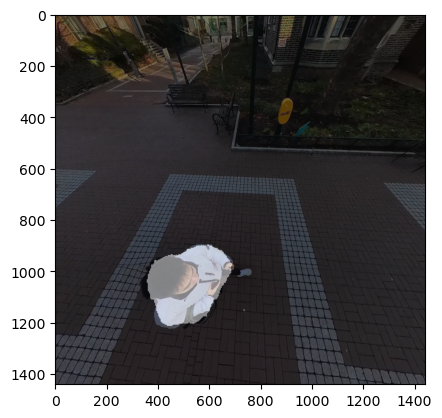

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


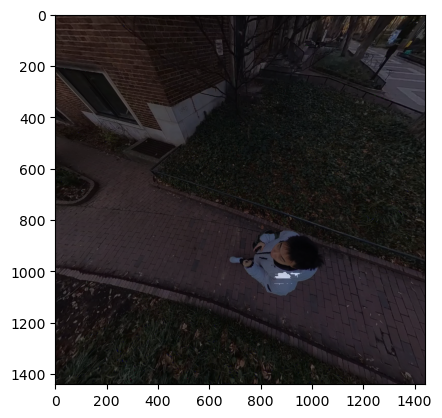

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


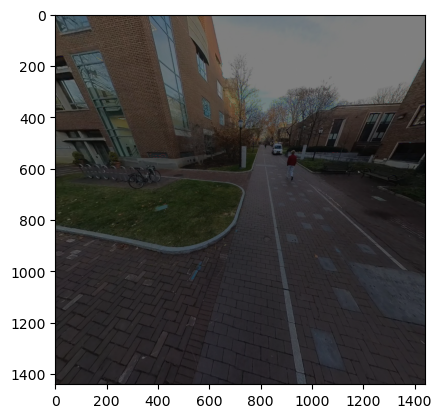

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


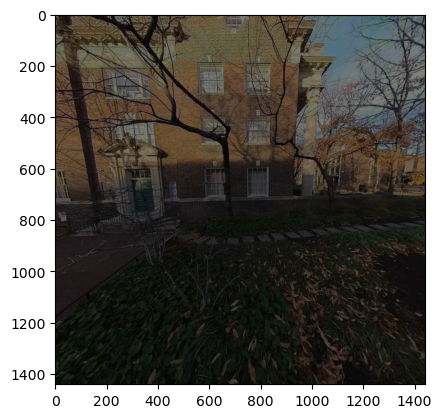

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


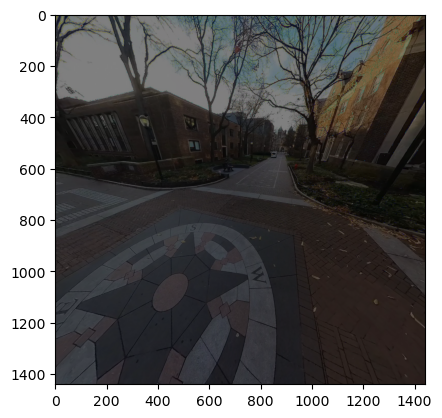

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


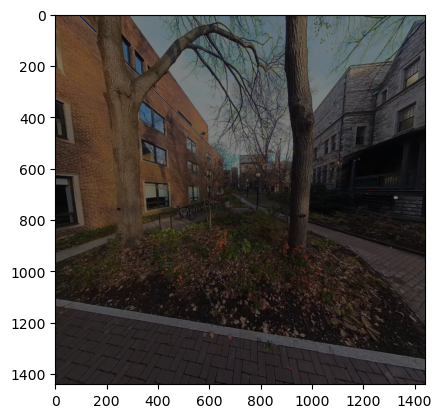

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


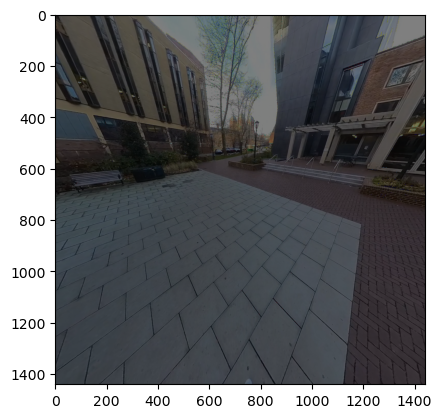

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


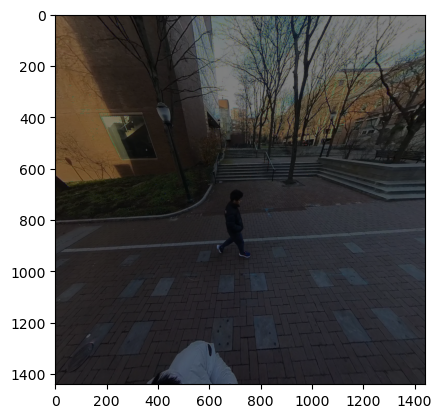

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


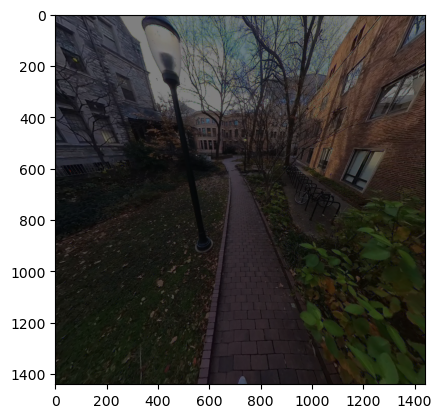

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


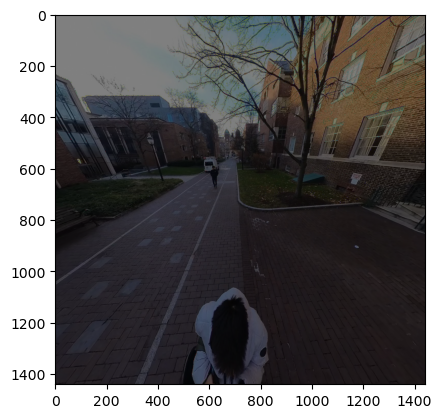

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


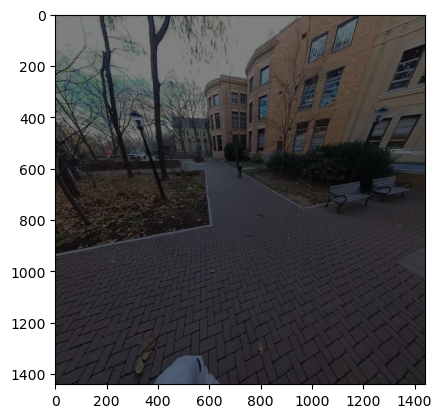

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


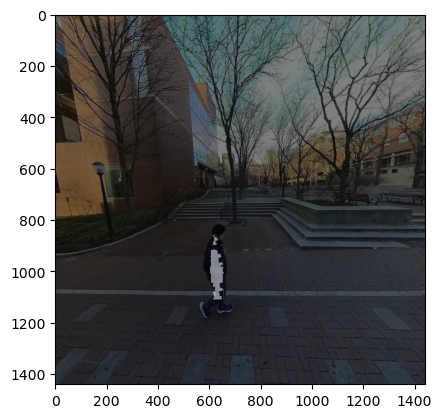

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


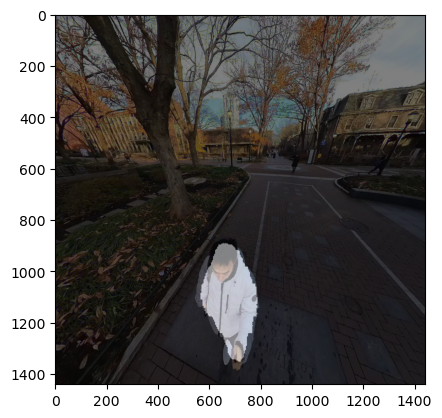

Image Shape (1440, 1440, 3)
Label Shape (1440, 1440, 3)


In [36]:
for i in range(len(image_array)):
    for j in range(len(prompts) - 1):
        image = numpy_images[i]
        print("Image Shape", image.shape)
        label = rescaled_labels[i * len(prompts) + j]
        print("Label Shape", label.shape)
        numpyLabel = np.array(label)
        plt.imshow(image, cmap='gray')
        plt.imshow(numpyLabel, cmap='jet', alpha=0.5)
        plt.show()

In [ ]:
positions_array = []
for i in range(len(image_array)):
    positions = np.where(rescaled_labels[i] == 255)
    positions_array.append(positions)
    

In [ ]:
import h5py

with h5py.File('rescaled_labels.h5', 'w') as f:
    labels_group = f.create_group('labels')
    for i, label in enumerate(positions_array):
        labels_group.create_dataset(f'label_{i}', data=label)
